In [1]:
pip install  import_ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ndlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from math import *
import pandas as pd
import import_ipynb 
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

from TOPSIS import Topsis

importing Jupyter notebook from TOPSIS.ipynb


Graph with 34 nodes and 78 edges


C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_14684\1110000465.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


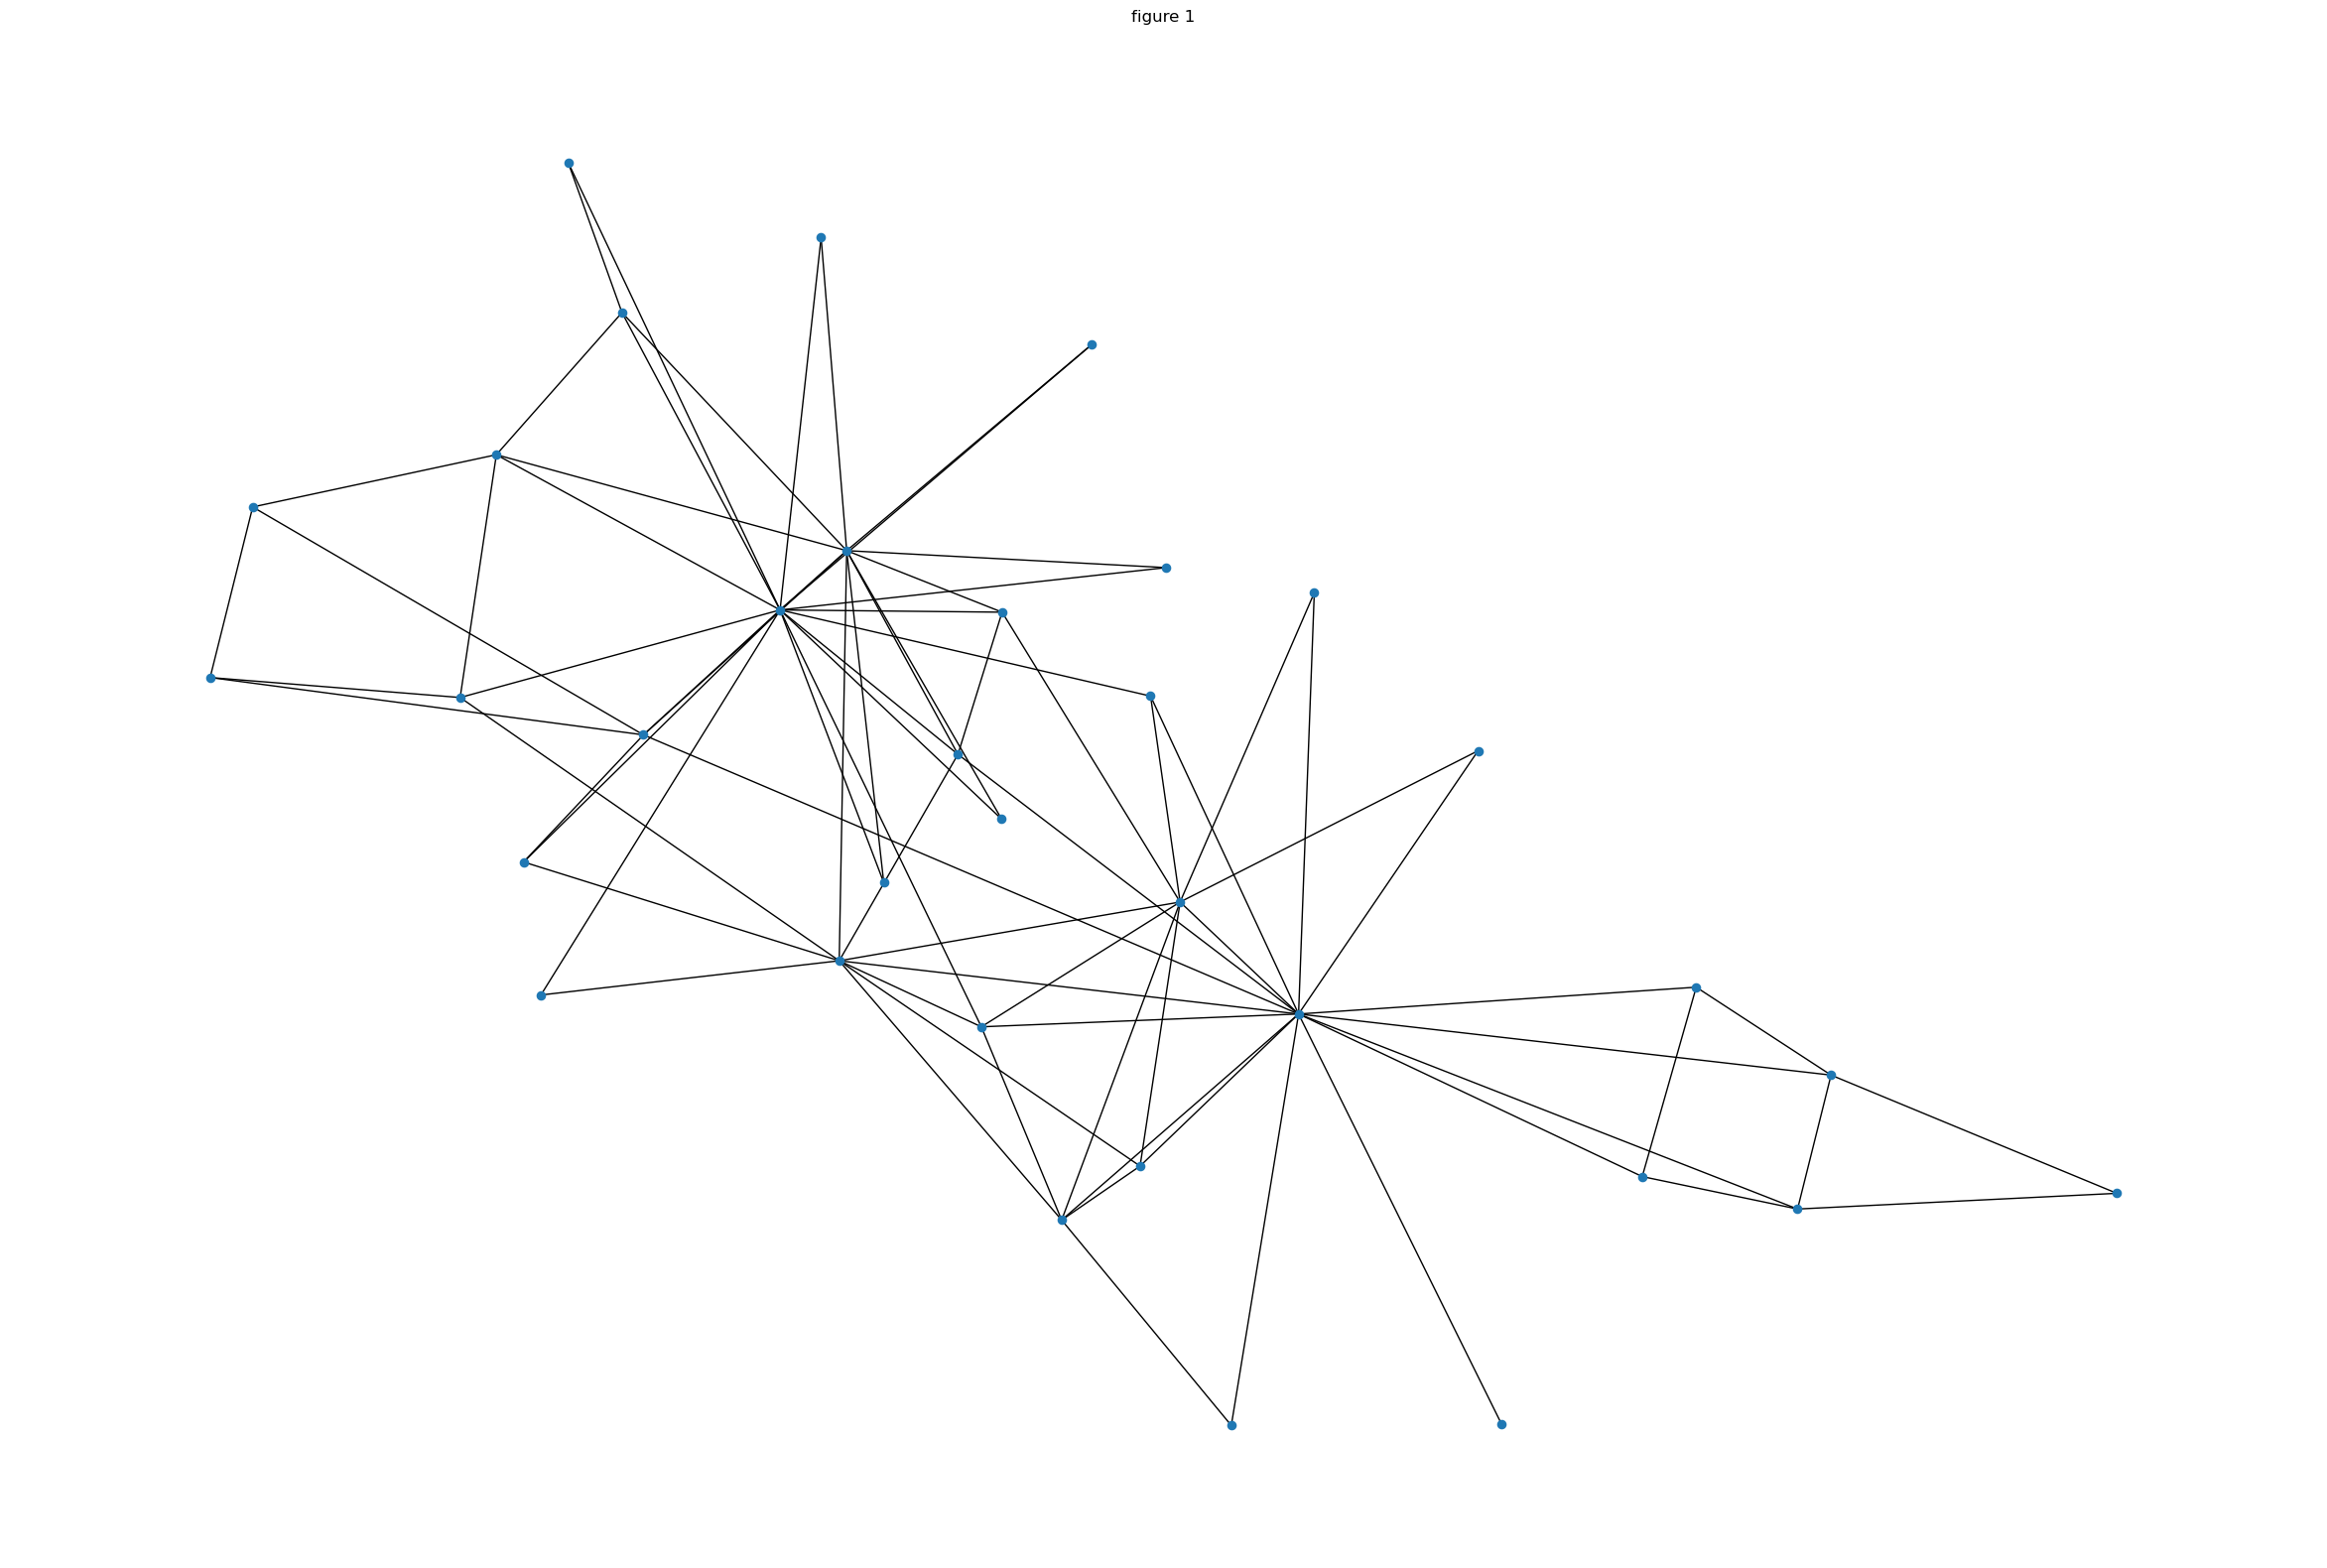

In [4]:
# Read facebook dataset
plt.figure(figsize=(30,20))
G=nx.read_edgelist('Data/karate.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)
print(nx.info(G))
nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [5]:
# Centrality measures
deg_centrality = nx.degree_centrality(G)
close_centrality = nx.closeness_centrality(G)
bet_centrality = nx.betweenness_centrality(G)
eig_centrality=nx.eigenvector_centrality(G)

In [6]:
Matrix=pd.DataFrame()#create dataframe
for noued in G:
    #add the name of each node with its measures centrality
    Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued], 'EC':eig_centrality[noued]},ignore_index=True)
print(Matrix)
Matrix.to_csv("Data/Matrix.csv" ,index=False)

   Node w_Node        DC        BC        CC        EC
0     1      1  0.484848  0.437635  0.568966  0.355483
1     2      2  0.272727  0.053937  0.485294  0.265954
2     3      3  0.303030  0.143657  0.559322  0.317189
3     4      4  0.181818  0.011909  0.464789  0.211174
4     5      5  0.090909  0.000631  0.379310  0.075966
5     6      6  0.121212  0.029987  0.383721  0.079481
6     7      7  0.121212  0.029987  0.383721  0.079481
7     8      8  0.121212  0.000000  0.440000  0.170955
8     9      9  0.151515  0.055927  0.515625  0.227405
9    11     11  0.090909  0.000631  0.379310  0.075966
10   12     12  0.030303  0.000000  0.366667  0.052854
11   13     13  0.060606  0.000000  0.370787  0.084252
12   14     14  0.151515  0.045863  0.515625  0.226470
13   20     20  0.090909  0.032475  0.500000  0.147911
14   22     22  0.060606  0.000000  0.375000  0.092397
15   32     32  0.181818  0.138276  0.540984  0.191036
16   10     10  0.060606  0.000848  0.434211  0.102675
17   17   

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_14684\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_14684\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_14684\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghr

In [7]:
Matrix = pd.read_csv("Data/Matrix.csv")

In [8]:
Matrix_arr= Matrix[['DC','BC','CC','EC']].to_numpy()

Matrix_arr

array([[0.48484848, 0.43763528, 0.56896552, 0.35548349],
       [0.27272727, 0.05393669, 0.48529412, 0.26595387],
       [0.3030303 , 0.14365681, 0.55932203, 0.31718939],
       [0.18181818, 0.01190927, 0.46478873, 0.21117408],
       [0.09090909, 0.00063131, 0.37931034, 0.07596646],
       [0.12121212, 0.02998737, 0.38372093, 0.07948058],
       [0.12121212, 0.02998737, 0.38372093, 0.07948058],
       [0.12121212, 0.        , 0.44      , 0.17095511],
       [0.15151515, 0.05592683, 0.515625  , 0.22740509],
       [0.09090909, 0.00063131, 0.37931034, 0.07596646],
       [0.03030303, 0.        , 0.36666667, 0.05285417],
       [0.06060606, 0.        , 0.37078652, 0.08425192],
       [0.15151515, 0.0458634 , 0.515625  , 0.2264697 ],
       [0.09090909, 0.03247505, 0.5       , 0.14791134],
       [0.06060606, 0.        , 0.375     , 0.09239676],
       [0.18181818, 0.13827561, 0.54098361, 0.19103627],
       [0.06060606, 0.00084776, 0.43421053, 0.10267519],
       [0.06060606, 0.        ,

In [9]:
#ev_matrix_np 
m = 34
ev_matrix_np = Matrix_arr
sum = np.zeros(4)

for i in range(m):
  for j in range(4):
    sum[j] += ev_matrix_np[i][j]

p = np.copy(ev_matrix_np)

for i in range(m):
  for j in range(4):
    p[i][j] = ev_matrix_np[i][j]/sum[j]


p

array([[0.1025641 , 0.29249548, 0.03923817, 0.07141109],
       [0.05769231, 0.03604882, 0.03346785, 0.05342599],
       [0.06410256, 0.09601366, 0.03857312, 0.06371841],
       [0.03846154, 0.00795961, 0.03205372, 0.04242158],
       [0.01923077, 0.00042194, 0.02615878, 0.01526048],
       [0.02564103, 0.02004219, 0.02646295, 0.01596641],
       [0.02564103, 0.02004219, 0.02646295, 0.01596641],
       [0.02564103, 0.        , 0.03034418, 0.03434222],
       [0.03205128, 0.03737894, 0.03555959, 0.04568214],
       [0.01923077, 0.00042194, 0.02615878, 0.01526048],
       [0.00641026, 0.        , 0.02528682, 0.01061758],
       [0.01282051, 0.        , 0.02557094, 0.0169249 ],
       [0.03205128, 0.030653  , 0.03555959, 0.04549423],
       [0.01923077, 0.02170484, 0.03448203, 0.02971308],
       [0.01282051, 0.        , 0.02586152, 0.01856107],
       [0.03846154, 0.09241712, 0.03730842, 0.03837621],
       [0.01282051, 0.00056661, 0.02994492, 0.02062585],
       [0.01282051, 0.        ,

In [10]:
k = 1/log(m)
E = []
plnp = []


for j in range(4):
  temp_sum = 0
  for i in range(m):
    try:
       pij = p[i][j]
       temp_sum += pij*log(pij)
    except:
      pij = 1
      temp_sum += pij*log(pij)
  E.append(-k*temp_sum)

E

[0.9247089847494877, 0.6234261720089411, 0.996138378879709, 0.951830430891116]

In [11]:
D = []
for i in range(4):
  D.append(1-E[i])
D

[0.0752910152505123,
 0.3765738279910589,
 0.003861621120290981,
 0.048169569108884036]

In [12]:
sm = np.sum(D)
weights = [D[i]/sm for i in range(4)]
weights

[0.14941775733363324,
 0.7473244538110081,
 0.007663527521129353,
 0.09559426133422924]

In [13]:
# Decision Matrix for w_topsis
Evaluation_matrix = Matrix_arr
criteria = np.array([True,True,True,True])

w_T = Topsis(Evaluation_matrix,weights,criteria)
w_T.calc()

Step 1
 [[0.48484848 0.43763528 0.56896552 0.35548349]
 [0.27272727 0.05393669 0.48529412 0.26595387]
 [0.3030303  0.14365681 0.55932203 0.31718939]
 [0.18181818 0.01190927 0.46478873 0.21117408]
 [0.09090909 0.00063131 0.37931034 0.07596646]
 [0.12121212 0.02998737 0.38372093 0.07948058]
 [0.12121212 0.02998737 0.38372093 0.07948058]
 [0.12121212 0.         0.44       0.17095511]
 [0.15151515 0.05592683 0.515625   0.22740509]
 [0.09090909 0.00063131 0.37931034 0.07596646]
 [0.03030303 0.         0.36666667 0.05285417]
 [0.06060606 0.         0.37078652 0.08425192]
 [0.15151515 0.0458634  0.515625   0.2264697 ]
 [0.09090909 0.03247505 0.5        0.14791134]
 [0.06060606 0.         0.375      0.09239676]
 [0.18181818 0.13827561 0.54098361 0.19103627]
 [0.06060606 0.00084776 0.43421053 0.10267519]
 [0.06060606 0.         0.28448276 0.02363479]
 [0.06060606 0.         0.375      0.09239676]
 [0.15151515 0.01761364 0.39285714 0.15012329]
 [0.09090909 0.00384049 0.375      0.0592082 ]
 [0.0

In [14]:
Evaluation_matrix = Matrix_arr
criteria = np.array([True,True,True,True])
weights = [0.1,0.1,0.4,0.4]

T = Topsis(Evaluation_matrix,weights,criteria)
T.calc()

Step 1
 [[0.48484848 0.43763528 0.56896552 0.35548349]
 [0.27272727 0.05393669 0.48529412 0.26595387]
 [0.3030303  0.14365681 0.55932203 0.31718939]
 [0.18181818 0.01190927 0.46478873 0.21117408]
 [0.09090909 0.00063131 0.37931034 0.07596646]
 [0.12121212 0.02998737 0.38372093 0.07948058]
 [0.12121212 0.02998737 0.38372093 0.07948058]
 [0.12121212 0.         0.44       0.17095511]
 [0.15151515 0.05592683 0.515625   0.22740509]
 [0.09090909 0.00063131 0.37931034 0.07596646]
 [0.03030303 0.         0.36666667 0.05285417]
 [0.06060606 0.         0.37078652 0.08425192]
 [0.15151515 0.0458634  0.515625   0.2264697 ]
 [0.09090909 0.03247505 0.5        0.14791134]
 [0.06060606 0.         0.375      0.09239676]
 [0.18181818 0.13827561 0.54098361 0.19103627]
 [0.06060606 0.00084776 0.43421053 0.10267519]
 [0.06060606 0.         0.28448276 0.02363479]
 [0.06060606 0.         0.375      0.09239676]
 [0.15151515 0.01761364 0.39285714 0.15012329]
 [0.09090909 0.00384049 0.375      0.0592082 ]
 [0.0

In [15]:
# S+ and S-
print("best_distance\t", T.best_distance)
print("worst_distance\t", T.worst_distance)

best_distance	 [0.00771013 0.08169517 0.05772612 0.1027487  0.14840348 0.1439869
 0.1439869  0.11718838 0.09353985 0.14840348 0.15793645 0.146915
 0.09492921 0.12028254 0.14422028 0.09406118 0.1392174  0.16979039
 0.14422028 0.12200232 0.15370998 0.15454384 0.12546362 0.1291304
 0.12901671 0.1499372  0.11415286 0.0578154  0.14157687 0.14157687
 0.14157687 0.14157687 0.14157687 0.02255423]
worst_distance	 [0.16394529 0.10497464 0.13013781 0.08158453 0.02641152 0.02909244
 0.02909244 0.0644643  0.09059909 0.02641152 0.01751109 0.02799411
 0.09010355 0.06085222 0.03116135 0.08295686 0.03965133 0.00287242
 0.03116135 0.05473823 0.02102752 0.02044743 0.05272228 0.05086352
 0.04801603 0.02436764 0.06704611 0.12622098 0.03411019 0.03411019
 0.03411019 0.03411019 0.03411019 0.16139169]


In [16]:
# S+ and S-
print("best_distance\t", w_T.best_distance)
print("worst_distance\t", w_T.worst_distance)

best_distance	 [0.00462001 0.48123537 0.36894885 0.53477729 0.55059671 0.51366586
 0.51366586 0.55053529 0.48038266 0.55059671 0.55250003 0.55182454
 0.49289581 0.51074643 0.55178607 0.37778181 0.55068708 0.55214544
 0.55178607 0.52827907 0.54669819 0.54873389 0.52291701 0.54890455
 0.5470345  0.5518667  0.53260435 0.36637673 0.55174483 0.55174483
 0.55174483 0.55174483 0.55174483 0.16704638]
worst_distance	 [0.55204454 0.07916231 0.18591149 0.03168723 0.00997069 0.04001323
 0.04001323 0.01908765 0.07461561 0.00997069 0.00280435 0.00721577
 0.06294133 0.04318566 0.00785518 0.17500513 0.00876597 0.00429191
 0.00785518 0.03043601 0.01041126 0.00957084 0.03250492 0.01358217
 0.01710253 0.00656785 0.02645155 0.18966619 0.00858844 0.00858844
 0.00858844 0.00858844 0.00858844 0.38790652]


In [17]:
print("worst_similarity\t", T.worst_similarity)
print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())

worst_similarity	 [0.95508368 0.56235467 0.69272376 0.44259263 0.15108269 0.16808733
 0.16808733 0.3548767  0.49201483 0.15108269 0.0998081  0.16004946
 0.48695998 0.33594999 0.17767736 0.46863506 0.2216784  0.01663604
 0.17767736 0.30970951 0.12033776 0.1168483  0.29588359 0.28258467
 0.27122682 0.139799   0.37001374 0.68584796 0.1941531  0.1941531
 0.1941531  0.1941531  0.1941531  0.87738661]
rank_to_worst_similarity	 [18, 11, 22, 21, 26, 5, 10, 12, 6, 7, 15, 19, 32, 29, 30, 31, 33, 17, 25, 24, 23, 20, 14, 8, 27, 4, 16, 13, 9, 2, 28, 3, 34, 1]


In [18]:
print("worst_similarity\t", w_T.worst_similarity)
print("rank_to_worst_similarity\t", w_T.rank_to_worst_similarity())

worst_similarity	 [0.99170055 0.14126096 0.33505997 0.05593859 0.01778678 0.0722679
 0.0722679  0.03350927 0.13444296 0.01778678 0.00505012 0.01290742
 0.113237   0.07796202 0.0140361  0.31658695 0.01566882 0.0077132
 0.0140361  0.05447501 0.018688   0.01714268 0.05852293 0.02414664
 0.03031627 0.01176117 0.04731468 0.34109991 0.01532737 0.01532737
 0.01532737 0.01532737 0.01532737 0.69898999]
rank_to_worst_similarity	 [11, 18, 26, 12, 19, 15, 32, 30, 29, 33, 31, 17, 22, 5, 10, 21, 24, 25, 8, 27, 20, 4, 23, 7, 6, 14, 13, 9, 2, 16, 3, 28, 34, 1]


In [19]:
print("best_similarity\t", T.best_similarity)
print("rank_to_best_similarity\t", T.rank_to_best_similarity())

best_similarity	 [0.04491632 0.43764533 0.30727624 0.55740737 0.84891731 0.83191267
 0.83191267 0.6451233  0.50798517 0.84891731 0.9001919  0.83995054
 0.51304002 0.66405001 0.82232264 0.53136494 0.7783216  0.98336396
 0.82232264 0.69029049 0.87966224 0.8831517  0.70411641 0.71741533
 0.72877318 0.860201   0.62998626 0.31415204 0.8058469  0.8058469
 0.8058469  0.8058469  0.8058469  0.12261339]
rank_to_best_similarity	 [1, 34, 3, 28, 2, 9, 13, 16, 4, 27, 8, 14, 20, 23, 24, 25, 17, 32, 31, 30, 33, 29, 15, 19, 7, 6, 12, 10, 5, 26, 21, 22, 11, 18]


In [20]:
print("best_similarity\t", w_T.best_similarity)
print("rank_to_best_similarity\t", w_T.rank_to_best_similarity())

best_similarity	 [0.00829945 0.85873904 0.66494003 0.94406141 0.98221322 0.9277321
 0.9277321  0.96649073 0.86555704 0.98221322 0.99494988 0.98709258
 0.886763   0.92203798 0.9859639  0.68341305 0.98433118 0.9922868
 0.9859639  0.94552499 0.981312   0.98285732 0.94147707 0.97585336
 0.96968373 0.98823883 0.95268532 0.65890009 0.98467263 0.98467263
 0.98467263 0.98467263 0.98467263 0.30101001]
rank_to_best_similarity	 [1, 34, 28, 3, 16, 2, 9, 13, 14, 6, 7, 23, 4, 20, 27, 8, 25, 24, 21, 10, 5, 22, 17, 33, 29, 30, 31, 32, 15, 19, 12, 26, 18, 11]


In [21]:
#Convert S+ and S- to array numpy
Best_Dist = np.array(T.best_distance)
Worst_Dist = np.array(T.worst_distance)

In [22]:
#Convert S+ and S- to array numpy
w_Best_Dist = np.array(w_T.best_distance)
w_Worst_Dist = np.array(w_T.worst_distance)

Calculate Closness


In [23]:
Closnness = []
Closnness = Worst_Dist / (Worst_Dist + Best_Dist)

In [24]:
w_Closnness = []
w_Closnness = w_Worst_Dist / (w_Worst_Dist + w_Best_Dist)

In [25]:
#Convert S+, S- and Closnness to DataFrame 
Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
Clos = pd.DataFrame(Closnness,columns=['C'])
# Concatenate results
Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
Out

,S+,S-,C
0,0.007710,0.163945,0.955084
1,0.081695,0.104975,0.562355
2,0.057726,0.130138,0.692724
3,0.102749,0.081585,0.442593
4,0.148403,0.026412,0.151083
5,0.143987,0.029092,0.168087
6,0.143987,0.029092,0.168087
7,0.117188,0.064464,0.354877
8,0.093540,0.090599,0.492015
9,0.148403,0.026412,0.151083


In [26]:
#Convert S+, S- and Closnness to DataFrame 
w_Worst_Distance = pd.DataFrame(w_Worst_Dist,columns=['S-'])
w_Best_Distance = pd.DataFrame(w_Best_Dist,columns=['S+'])
w_Clos = pd.DataFrame(w_Closnness,columns=['C'])
# Concatenate results
w_Out = pd.concat([w_Best_Distance, w_Worst_Distance, w_Clos], axis=1)
w_Out

,S+,S-,C
0,0.004620,0.552045,0.991701
1,0.481235,0.079162,0.141261
2,0.368949,0.185911,0.335060
3,0.534777,0.031687,0.055939
4,0.550597,0.009971,0.017787
5,0.513666,0.040013,0.072268
6,0.513666,0.040013,0.072268
7,0.550535,0.019088,0.033509
8,0.480383,0.074616,0.134443
9,0.550597,0.009971,0.017787


In [27]:
#sort DataFrame by Closnness Column (Descending)
Out = Out.sort_values(by="C",ascending=False)
Out

# Save it into a csv file (out.csv)
Out.to_csv("Data/Out.csv",index=False)

In [28]:
#sort DataFrame by Closnness Column (Descending)
w_Out = w_Out.sort_values(by="C",ascending=False)
w_Out

# Save it into a csv file (out.csv)
w_Out.to_csv("Data/w_Out.csv",index=False)

In [29]:
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
C = ranking_closness(Closnness)
C



[0,
 33,
 2,
 27,
 1,
 8,
 12,
 15,
 3,
 26,
 7,
 13,
 19,
 22,
 23,
 24,
 16,
 32,
 30,
 29,
 28,
 31,
 18,
 14,
 6,
 5,
 11,
 9,
 4,
 25,
 20,
 21,
 10,
 17]

In [30]:
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
w_C = ranking_closness(w_Closnness)
w_C



[0,
 33,
 27,
 2,
 15,
 1,
 8,
 12,
 13,
 5,
 6,
 22,
 3,
 19,
 26,
 7,
 24,
 23,
 20,
 9,
 4,
 21,
 16,
 30,
 32,
 28,
 29,
 31,
 14,
 18,
 11,
 25,
 17,
 10]

In [31]:

#retrieve the nodes that correspond to the indices returned by the function above
Tab = []
for i in range(len(C)):
       Tab.append(Matrix['Node'].loc[C[i]])
        
Tab

[1,
 34,
 3,
 33,
 2,
 9,
 14,
 32,
 4,
 31,
 8,
 20,
 24,
 28,
 29,
 30,
 10,
 23,
 19,
 16,
 15,
 21,
 18,
 22,
 7,
 6,
 13,
 11,
 5,
 27,
 26,
 25,
 12,
 17]

In [32]:

#retrieve the nodes that correspond to the indices returned by the function above
w_Tab = []
for i in range(len(w_C)):
       w_Tab.append(Matrix['w_Node'].loc[w_C[i]])
        
w_Tab

[1,
 34,
 33,
 3,
 32,
 2,
 9,
 14,
 20,
 6,
 7,
 28,
 4,
 24,
 31,
 8,
 30,
 29,
 26,
 11,
 5,
 25,
 10,
 19,
 23,
 15,
 16,
 21,
 22,
 18,
 13,
 27,
 17,
 12]

In [33]:
#Convert Tab above to DataFrame 
Tab_Data=pd.DataFrame(Tab,columns=["Node"])

Tab_Data["Node"].to_csv("Data/Topsis.csv",index=False)

In [34]:
#Convert Tab above to DataFrame 
w_Tab_Data=pd.DataFrame(w_Tab,columns=["w_Node"])

w_Tab_Data["w_Node"].to_csv("Data/w_Topsis.csv",index=False)

In [35]:
Final_Tab = pd.concat([pd.read_csv("Data/Out.csv"),Tab_Data],axis=1)

Final_Tab.head(10)

,S+,S-,C,Node
0,0.007710,0.163945,0.955084,1
1,0.022554,0.161392,0.877387,34
2,0.057726,0.130138,0.692724,3
3,0.057815,0.126221,0.685848,33
4,0.081695,0.104975,0.562355,2
5,0.093540,0.090599,0.492015,9
6,0.094929,0.090104,0.486960,14
7,0.094061,0.082957,0.468635,32
8,0.102749,0.081585,0.442593,4
9,0.114153,0.067046,0.370014,31


In [36]:
w_Final_Tab = pd.concat([pd.read_csv("Data/w_Out.csv"),w_Tab_Data],axis=1)

w_Final_Tab.head(10)

,S+,S-,C,w_Node
0,0.004620,0.552045,0.991701,1
1,0.167046,0.387907,0.698990,34
2,0.366377,0.189666,0.341100,33
3,0.368949,0.185911,0.335060,3
4,0.377782,0.175005,0.316587,32
5,0.481235,0.079162,0.141261,2
6,0.480383,0.074616,0.134443,9
7,0.492896,0.062941,0.113237,14
8,0.510746,0.043186,0.077962,20
9,0.513666,0.040013,0.072268,6


In [37]:
K = 5

for i in range(K):
    print("The",i+1,"top influential node is ",Final_Tab["Node"][i])

The 1 top influential node is  1
The 2 top influential node is  34
The 3 top influential node is  3
The 4 top influential node is  33
The 5 top influential node is  2


In [38]:
K = 5

for i in range(K):
    print("The",i+1,"top influential node is ",w_Final_Tab["w_Node"][i])

The 1 top influential node is  1
The 2 top influential node is  34
The 3 top influential node is  33
The 4 top influential node is  3
The 5 top influential node is  32


In [39]:
Out1 = pd.concat([Matrix, Clos], axis=1)
Out1
Out1 = Out1.sort_values(by="C",ascending=False)
Out1

# Save it into a csv file (out.csv)
Out1.to_csv("Data/Out1.csv",index=False)
Out1.head(10)

,Node,w_Node,DC,BC,CC,EC,C
0,1,1,0.484848,0.437635,0.568966,0.355483,0.955084
33,34,34,0.515152,0.304075,0.550000,0.373371,0.877387
2,3,3,0.303030,0.143657,0.559322,0.317189,0.692724
27,33,33,0.363636,0.145247,0.515625,0.308651,0.685848
1,2,2,0.272727,0.053937,0.485294,0.265954,0.562355
8,9,9,0.151515,0.055927,0.515625,0.227405,0.492015
12,14,14,0.151515,0.045863,0.515625,0.226470,0.486960
15,32,32,0.181818,0.138276,0.540984,0.191036,0.468635
3,4,4,0.181818,0.011909,0.464789,0.211174,0.442593
26,31,31,0.121212,0.014412,0.458333,0.174760,0.370014


In [40]:
w_Out1 = pd.concat([Matrix, w_Clos], axis=1)
w_Out1
w_Out1 = w_Out1.sort_values(by="C",ascending=False)
w_Out1

# Save it into a csv file (out.csv)
w_Out1.to_csv("Data/w_Out1.csv",index=False)
w_Out1.head(10)

,Node,w_Node,DC,BC,CC,EC,C
0,1,1,0.484848,0.437635,0.568966,0.355483,0.991701
33,34,34,0.515152,0.304075,0.550000,0.373371,0.698990
27,33,33,0.363636,0.145247,0.515625,0.308651,0.341100
2,3,3,0.303030,0.143657,0.559322,0.317189,0.335060
15,32,32,0.181818,0.138276,0.540984,0.191036,0.316587
1,2,2,0.272727,0.053937,0.485294,0.265954,0.141261
8,9,9,0.151515,0.055927,0.515625,0.227405,0.134443
12,14,14,0.151515,0.045863,0.515625,0.226470,0.113237
13,20,20,0.090909,0.032475,0.500000,0.147911,0.077962
6,7,7,0.121212,0.029987,0.383721,0.079481,0.072268


**The top-10 ranked nodes by Topsis and Centrality measures**

In [41]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = Out1[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("Data/DCR.csv",index=False)

In [42]:
#The top-10 ranked nodes by degree centrality (DC)
w_DCR = w_Out1[["w_Node", "DC"]]
w_DCR = w_DCR.sort_values(by='DC', ascending=False)
w_DCR.rename(columns = {'w_Node':'w_DCN'}, inplace=True)

w_DCR["w_DCN"].to_csv("Data/w_DCR.csv",index=False)

In [43]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = Out1[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("Data/BCR.csv",index=False)

In [44]:
#The top-10 ranked nodes by betweenness centrality (BC)
w_BCR = w_Out1[["w_Node", "BC"]]
w_BCR = w_BCR.sort_values(by='BC', ascending=False)
w_BCR.rename(columns = {'w_Node':'w_BCN'}, inplace=True)

w_BCR["w_BCN"].to_csv("Data/w_BCR.csv",index=False)

In [45]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = Out1[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("Data/CCR.csv",index=False)

In [46]:
#The top-10 ranked nodes by closeness centrality (CC)
w_CCR = w_Out1[["w_Node", "CC"]]
w_CCR = w_CCR.sort_values(by='CC', ascending=False)
w_CCR.rename(columns = {'w_Node':'w_CCN'}, inplace=True)

w_CCR["w_CCN"].to_csv("Data/w_CCR.csv",index=False)

In [47]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = Out1[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("Data/ECR.csv",index=False)

In [48]:
#The top-10 ranked nodes by eigenvector centrality (EC)
w_ECR = Out1[["w_Node", "EC"]]
w_ECR = w_ECR.sort_values(by='EC', ascending=False)
w_ECR.rename(columns = {'w_Node':'w_ECN'}, inplace=True)

w_ECR["w_ECN"].to_csv("Data/w_ECR.csv",index=False)

In [49]:
fac = pd.concat([pd.read_csv("Data/DCR.csv"),pd.read_csv("Data/BCR.csv"), pd.read_csv("Data/CCR.csv"), pd.read_csv("Data/ECR.csv")],axis=1)


In [50]:
w_fac = pd.concat([pd.read_csv("Data/w_DCR.csv"),pd.read_csv("Data/w_BCR.csv"), pd.read_csv("Data/w_CCR.csv"), pd.read_csv("Data/w_ECR.csv")],axis=1)


In [51]:
#Concate the results
facebook = pd.concat([fac,pd.read_csv("Data/Topsis.csv")],axis=1)

facebook = facebook.head(10)
facebook

,DCN,BCN,CCN,ECN,Node
0,34,1,1,34,1
1,1,34,3,1,34
2,33,33,34,3,3
3,3,3,32,33,33
4,2,32,33,2,2
5,32,9,9,9,9
6,4,2,14,14,14
7,24,14,20,4,32
8,14,20,2,32,4
9,9,6,4,31,31


In [52]:
#Concate the results
w_facebook = pd.concat([w_fac,pd.read_csv("Data/w_Topsis.csv")],axis=1)

w_facebook = w_facebook.head(10)
w_facebook

,w_DCN,w_BCN,w_CCN,w_ECN,w_Node
0,34,1,1,34,1
1,1,34,3,1,34
2,33,33,34,3,33
3,3,3,32,33,3
4,2,32,33,2,32
5,32,9,9,9,2
6,4,2,14,14,9
7,24,14,20,4,14
8,9,20,2,32,20
9,14,6,4,31,6


**Application SI Model**

In [53]:
def SI(node):
    n = 34
    model = ep.SIModel(G)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', node)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break 
    return res

In [54]:
Rank_DC = SI(set(facebook['DCN']))
Rank_BC = SI(set(facebook['BCN']))
Rank_CC = SI(set(facebook['CCN']))
Rank_EC = SI(set(facebook['ECN']))
Rank_Topsis = SI(set(facebook['Node']))

In [55]:
w_Rank_DC = SI(set(w_facebook['w_DCN']))
w_Rank_BC = SI(set(w_facebook['w_BCN']))
w_Rank_CC = SI(set(w_facebook['w_CCN']))
w_Rank_EC = SI(set(w_facebook['w_ECN']))
w_Rank_Topsis = SI(set(w_facebook['w_Node']))

In [56]:
Rank_Topsis

,iteration,nb_Susceptible,Nb_infected
0,0,24,10
1,1,17,17
2,2,12,22
3,3,7,27
4,4,5,29
5,5,2,32
6,6,1,33
7,7,1,33
8,8,1,33
9,9,1,33


In [57]:
w_Rank_Topsis

,iteration,nb_Susceptible,Nb_infected
0,0,24,10
1,1,13,21
2,2,6,28
3,3,4,30
4,4,2,32
5,5,0,34


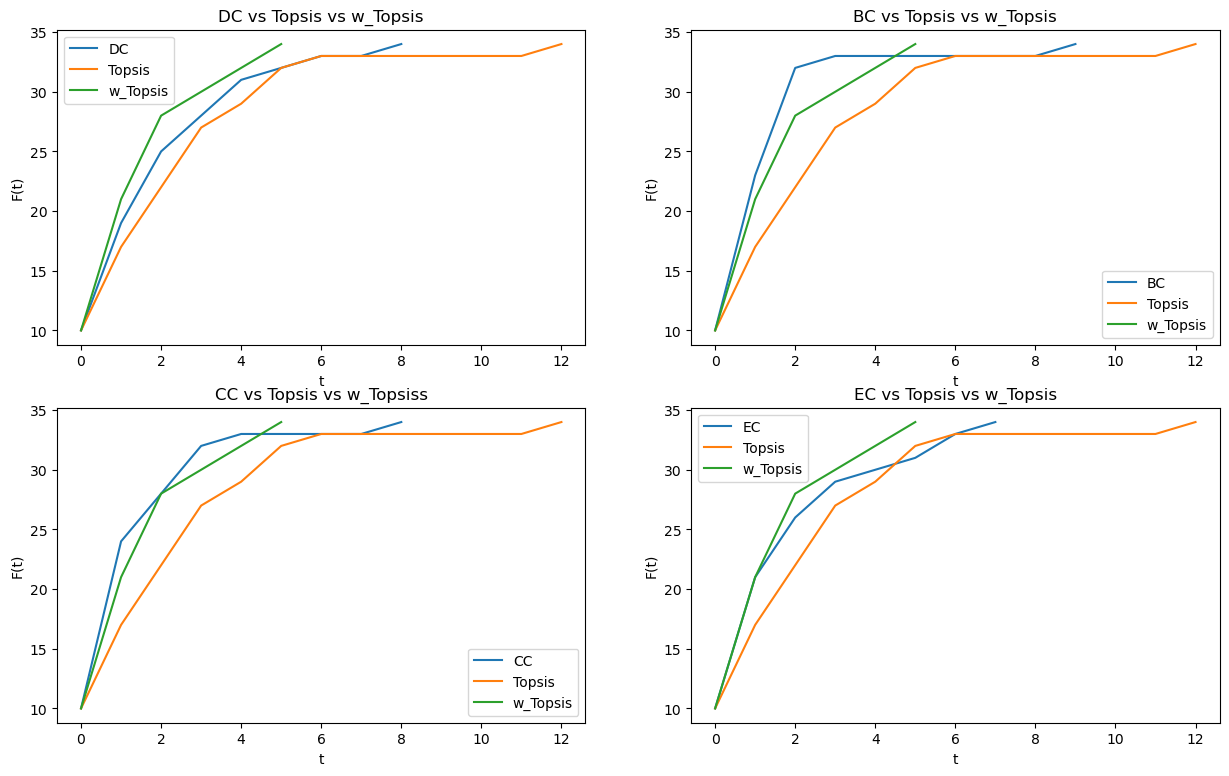

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs[0, 0].plot(Rank_DC['iteration'], Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 0].set_title("DC vs Topsis vs w_Topsis")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC['iteration'], Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 1].set_title("BC vs Topsis vs w_Topsis")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC['iteration'], Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 0].set_title("CC vs Topsis vs w_Topsiss")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC['iteration'], Rank_EC['Nb_infected'], label="EC")
axs[1, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 1].set_title("EC vs Topsis vs w_Topsis")
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')